In [22]:
import numpy as np 
import math
import pandas as pd 

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from numpy.polynomial.polynomial import polyfit

In [23]:
data = [[52, 4], [56, 9], [59, 7], [60, 12], [61, 3], [62, 9], [63, 6], [73, 11], [75, 13], [77, 13], [76, 19], [79, 16], [81, 17], [83, 17], [85, 13], [87, 21],[89, 23],[89, 30],[93, 24]]

In [24]:
df = pd.DataFrame(data, columns = ['Grade', 'Hours']) 

In [25]:
df

,Grade,Hours
0,52,4
1,56,9
2,59,7
3,60,12
4,61,3
5,62,9
6,63,6
7,73,11
8,75,13
9,77,13


In [26]:
x = df['Hours']
y = df['Grade']

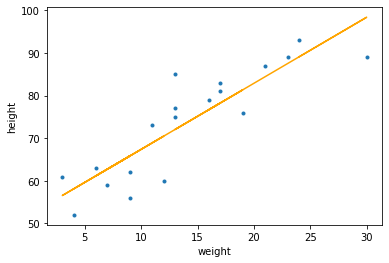

In [27]:
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-', color='orange')
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [28]:
def pass_fail():
    pass_fail_results = []
    for index, row in df.iterrows():
        grade = row['Grade']
        if grade >= 75:
            pass_fail_results.append(1)
        else:
            pass_fail_results.append(0)
    df['result'] = pass_fail_results

In [29]:
pass_fail()

In [30]:
df

,Grade,Hours,result
0,52,4,0
1,56,9,0
2,59,7,0
3,60,12,0
4,61,3,0
5,62,9,0
6,63,6,0
7,73,11,0
8,75,13,1
9,77,13,1


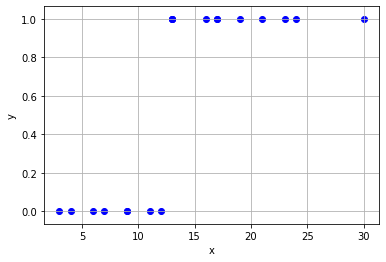

In [31]:
%matplotlib inline 
plt.scatter(x, df['result'], color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

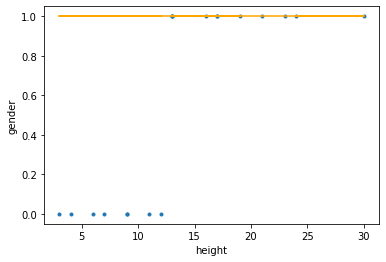

In [32]:
b, m = polyfit(x, y, 1)

z = 1/(1 + np.exp(- (m*x+b) )) 

plt.plot(x, df['result'], '.')
plt.plot(x, z, '-', color='orange')
plt.xlabel('height')
plt.ylabel('gender')
plt.show()

In [33]:
# b, m = polyfit(x, df['result'], 1)

# z = 1/(1 + np.exp(- (m*x+b) )) 

# plt.plot(x, df['result'], '.')
# plt.plot(x, z, '-', color='orange')
# # plt.xlabel('height')
# # plt.ylabel('gender')
# plt.show()

In [34]:
log = LogisticRegression()
x = x.values.reshape(-1,1)
log.fit(x, df['result'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
predictions = log.predict(x)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
print(classification_report(df['result'],predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [37]:
# x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
# y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
# h = .02  # step size in the mesh
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Z = log.predict(np.c_[xx.ravel(), yy.ravel()])

In [38]:
# predictions = predictions.reshape(xx.shape)
# plt.figure(1, figsize=(4, 3))
# plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# # Plot also the training points
# plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())

# plt.show()

In [39]:
data = pd.read_csv("data.csv", names=["test_one", "test_two", "accepted"])

In [40]:
data["test_one"] = data["test_one"].astype(int)
data["test_two"] = data["test_two"].astype(int)

In [41]:
def get_average():
    averages = []
    for index, row in data.iterrows():
        test_one = row['test_one']
        test_two = row['test_two']
        average = ((int(test_one) + int(test_two) / 2))
        averages.append(average)
    data['average'] = averages

In [42]:
get_average()

In [43]:
data

,test_one,test_two,accepted,average
0,34,78,0,73.0
1,30,43,0,51.5
2,35,72,0,71.0
3,60,86,1,103.0
4,79,75,1,116.5
...,...,...,...,...
95,83,48,1,107.0
96,42,87,1,85.5
97,99,68,1,133.0
98,55,64,1,87.0


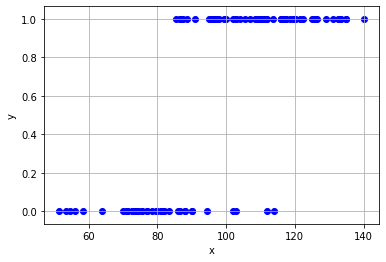

In [44]:
%matplotlib inline 
plt.scatter(data['average'], data['accepted'], color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

In [45]:
data = pd.read_csv("User_Data.csv")

In [46]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [47]:
new_data = [[52, 4], [56, 9], [59, 7], [60, 12], [61, 3], [62, 9], [63, 6], [73, 11], [75, 13], [77, 13], [80, 22], [85, 23], [95, 25], [90, 20], [95, 21], [87, 21],[89, 23],[89, 30],[93, 24]]





In [48]:
df = pd.DataFrame(new_data, columns = ['Grade', 'Hours']) 
x = df['Hours']
y = df['Grade']

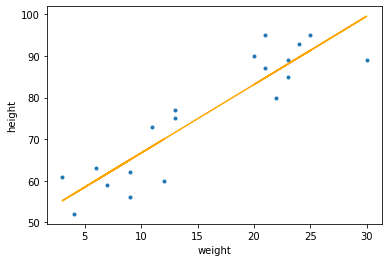

In [49]:
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-', color='orange')
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [50]:
def pass_fail():
    pass_fail_results = []
    for index, row in df.iterrows():
        grade = row['Grade']
        if grade >= 75:
            pass_fail_results.append(1)
        else:
            pass_fail_results.append(0)
    df['result'] = pass_fail_results

In [51]:
pass_fail()

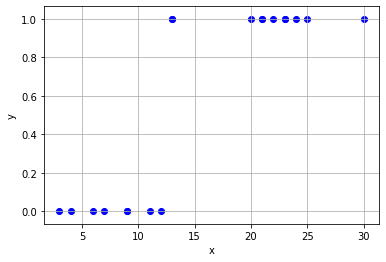

In [52]:
%matplotlib inline 
plt.scatter(x, df['result'], color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

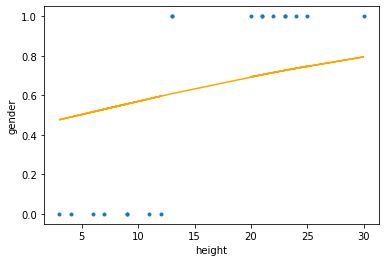

In [53]:
b, m = polyfit(x, df['result'], 1)

z = 1/(1 + np.exp(- (m*x+b) )) 

plt.plot(x, df['result'], '.')
plt.plot(x, z, '-', color='orange')
plt.xlabel('height')
plt.ylabel('gender')
plt.show()

In [54]:
x

0      4
1      9
2      7
3     12
4      3
5      9
6      6
7     11
8     13
9     13
10    22
11    23
12    25
13    20
14    21
15    21
16    23
17    30
18    24
Name: Hours, dtype: int64

In [55]:
y = list(df['result'])

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression()

In [58]:
model.fit(x, y)

ValueError: Expected 2D array, got 1D array instead:
array=[ 4.  9.  7. 12.  3.  9.  6. 11. 13. 13. 22. 23. 25. 20. 21. 21. 23. 30.
 24.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
model.predict(x)

In [ ]:
%matplotlib inline 
plt.scatter(x, y, color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();